In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import cv2
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,BatchNormalization,Activation,MaxPooling2D,Dropout
from keras.callbacks import ModelCheckpoint
%matplotlib inline


In [61]:
covid_path = "Desktop/keras-covid-19/dataset/covid/"
normal_path = "Desktop/keras-covid-19/dataset/normal/"

In [51]:
s=cv2.imread(normal_path + "0.jpg.jpeg")
s.shape

(1953, 2170, 3)

In [52]:
print(s)

[[[0 0 0]
  [0 0 0]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [2 2 2]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [9 9 9]
  [7 7 7]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [9 9 9]
  [7 7 7]
  [2 2 2]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [9 9 9]
  [7 7 7]
  [2 2 2]]]


In [53]:
q ="0.jpg.jpg"
q.split(".")[0]

'0'

In [154]:
#loading the training data
n=24
size=(96,96)
x=[]
y=[]
unseen_x = []
unseen_y = []

In [155]:
i=0
while(i<=n):
    file = str(i) + ".jpg.jpeg"
    file_path = covid_path + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    if(i<16):
        x.append(img)
        y.append("Covid")
    else:
        unseen_x.append(img)
        unseen_y.append("Covid")
    i+=1

i=0
while(i<=n):
    file = str(i) + ".jpg.jpeg"
    file_path = normal_path + file
    img=cv2.imread(file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,size)
    if(i<16):
        x.append(img)
        y.append("Normal")
    else:
        unseen_x.append(img)
        unseen_y.append("Normal")
    i+=1


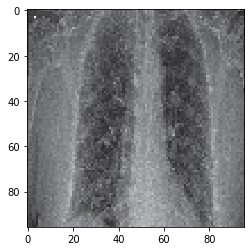

In [156]:
plt.imshow(x[0])

In [157]:
x = np.array(x)
y = np.array(y)
unseen_x = np.array(unseen_x)
unseen_y = np.array(unseen_y)

In [158]:
nb_classes = 2
encoder = LabelEncoder()
encoder_y = encoder.fit_transform(y)
y_onehot = np_utils.to_categorical(encoder_y,nb_classes)

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x,y_onehot, test_size=0.25, random_state=42,stratify=y_onehot)


In [160]:
print(x_train.shape)
print(y_train.shape)

(24, 96, 96, 3)
(24, 2)


In [161]:
x=shuffle(x,random_state=7)
y=shuffle(y,random_state=7)
unseen_x=shuffle(unseen_x,random_state=7)
unseen_y=shuffle(unseen_y,random_state=7)
print(x.shape)
print(y.shape)

(32, 96, 96, 3)
(32,)


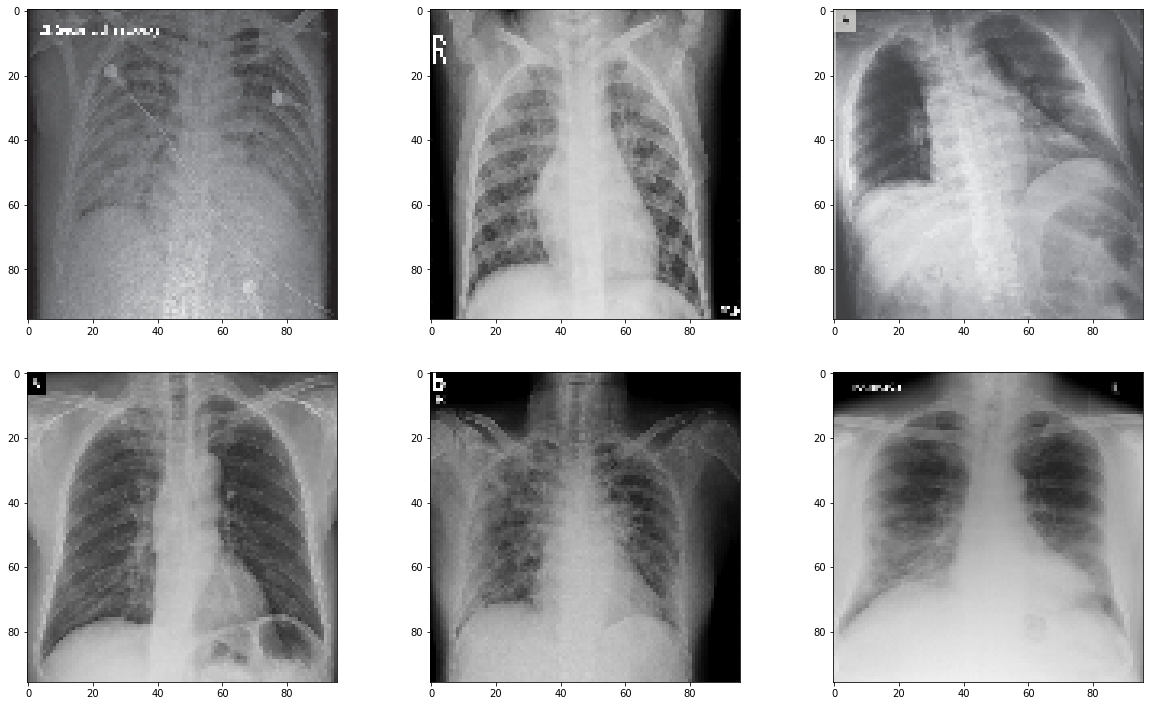

In [162]:
plt.figure(figsize=(20,20))
gsl = gridspec.GridSpec(3,3)
gsl.update(wspace = 0.3 , hspace = 0.0001)
for i in range(0,6):
    plt.subplots_adjust(wspace = 0.4)
    axl = plt.subplot(gsl[i])
    if(i<3):
        axl.imshow(x[i])
        plt.imshow(x[i])
    else:
        plt.imshow(x[i])

In [163]:
## model 1

model=Sequential()
model.add(Conv2D(kernel_size=(3,3),filters=3,input_shape=(96,96,3),activation="relu"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(kernel_size=(3,3),filters=3,activation="relu"))
model.add(Conv2D(kernel_size=(5,5),filters=5,activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=10))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(100,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

filepath="./saved_models/best_model_6k96_ignore.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
model.compile(optimizer="adadelta",loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 94, 94, 3)         84        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 94, 94, 10)        280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 47, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 45, 45, 3)         273       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 41, 41, 5)         380       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 20, 20, 5)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 10)       

In [168]:
model.fit(x_train,y_train, validation_data=(x_test,y_test),batch_size=64,epochs=50,callbacks=[checkpoint])

Train on 24 samples, validate on 8 samples
Epoch 1/50
24/24 [==============================] - 0s 7ms/step - loss: 1.5336e-04 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 2/50
24/24 [==============================] - 0s 7ms/step - loss: 5.8028e-05 - accuracy: 1.0000 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 3/50
24/24 [==============================] - 0s 7ms/step - loss: 1.6905e-04 - accuracy: 1.0000 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0806 - val_accuracy: 1.0000
Epoch 5/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 6/50
24/24 [==============================] - 0s 17ms/step - loss: 0.0434 - accuracy: 0.9583 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 7/50
24/24 [==============================] - 0s 14ms/step - loss: 3.7299e-04 - accuracy: 1.0000 

In [169]:
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 4ms/step


[0.03630099445581436, 1.0]

In [170]:
cls = ['Covid','Normal']
def get_preds(x,model):
    img = cv2.resize(x,(96,96))
    img = np.reshape(img,(1,96,96,3))
    pr = model.predict(img)    
    pr = np.array(pr)[0]
    idx = np.argmax(pr)
    conf = round(pr[idx]*100,2)
    lab = cls[idx]
    return lab,conf

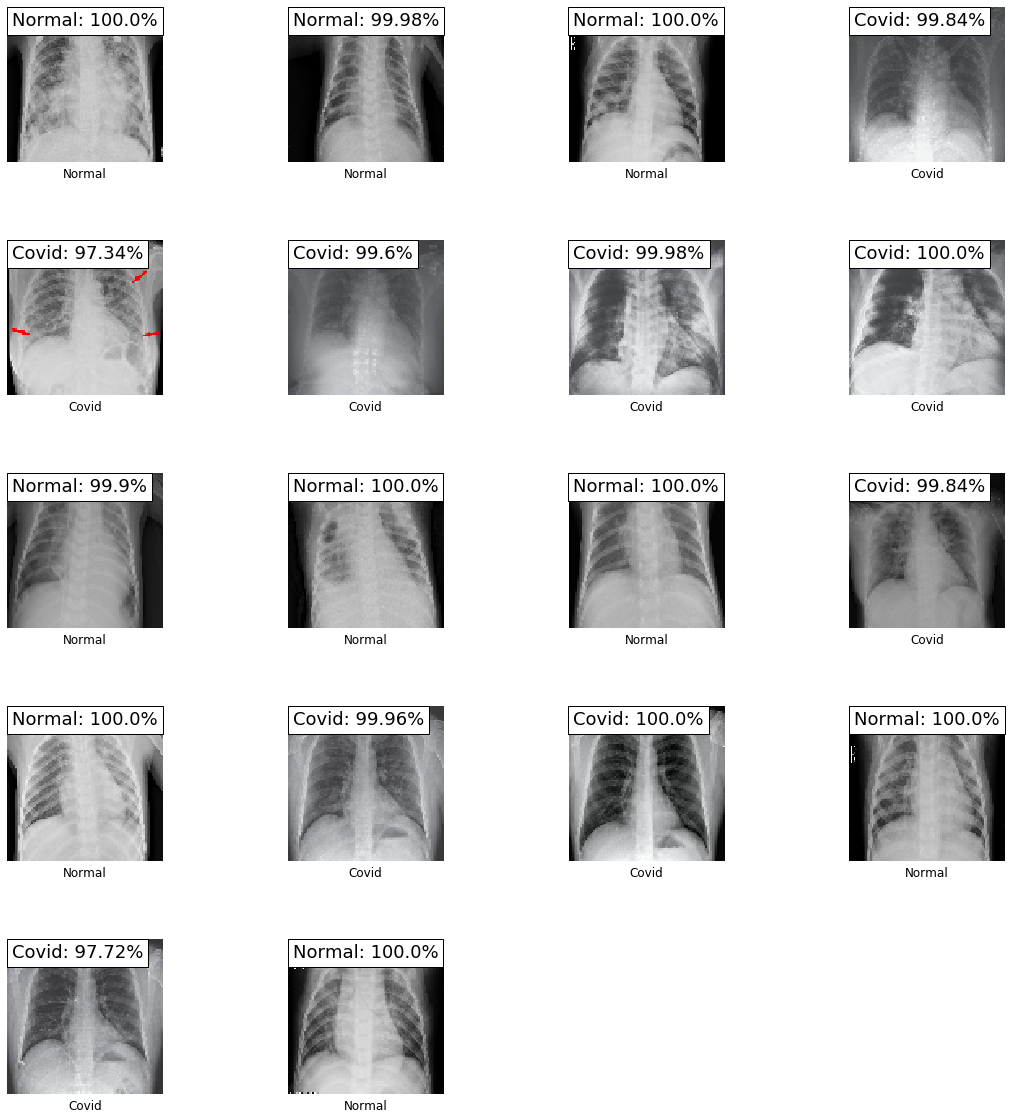

In [175]:
plt.figure(figsize = (20,20))
gs1 = gridspec.GridSpec(5 , 4)
gs1.update(wspace=0.025, hspace=0.5)
padding = 5
for i in range(0, 18):
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
    ax1 = plt.subplot(gs1[i])
    ax1.axis("off")
    ax1.text(0.5,-0.1, "{0}".format(unseen_y[i]), size=12, ha="center", transform=ax1.transAxes)
    pr,conf = get_preds(unseen_x[i],model)
    
    ax1.annotate(
    s = '{0}: {1}%'.format(pr,conf),
    fontsize = 18,
    xy=(0, 0), 
    xytext=(padding-1, -(padding-1)), 
    textcoords = 'offset pixels',
    bbox=dict(facecolor='white', alpha=1, pad=padding),
    va='top',
    ha='left',
    )
    
    ax1.imshow(unseen_x[i])


In [181]:
len(unseen_y)

18

In [182]:
unseen_y

array(['Normal', 'Normal', 'Normal', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Normal', 'Normal', 'Normal', 'Covid', 'Normal', 'Covid',
       'Covid', 'Normal', 'Covid', 'Normal'], dtype='<U6')